<a href="https://colab.research.google.com/github/Tiwari666/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/loan_train.csv')
df1.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
df1.shape

(30000, 24)

In [ ]:
df2 = pd.read_csv('/content/loan_test.csv')
df2.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [ ]:
df2.shape

(20000, 23)

In [ ]:
from tabulate import tabulate

# Concatenate the column names of df1 and df2
combined_columns = pd.concat([df1.columns.to_frame(name='df1_cols'), df2.columns.to_frame(name='df2_cols')], axis=1)

# Convert the concatenated DataFrame to a list of lists
combined_columns_list = combined_columns.values.tolist()

# Display the table
print(tabulate(combined_columns_list, headers=['df1 Columns', 'df2 Columns'], tablefmt='grid'))

+-----------------------------+-----------------------------+
| df1 Columns                 | df2 Columns                 |
+=============================+=============================+
| Customer ID                 | Customer ID                 |
+-----------------------------+-----------------------------+
| Name                        | Name                        |
+-----------------------------+-----------------------------+
| Gender                      | Gender                      |
+-----------------------------+-----------------------------+
| Age                         | Age                         |
+-----------------------------+-----------------------------+
| Income (USD)                | Income (USD)                |
+-----------------------------+-----------------------------+
| Income Stability            | Income Stability            |
+-----------------------------+-----------------------------+
| Profession                  | Profession                  |
+-------

As the test dataset does not have the target variable (Loan Sanction Amount), we will use only the train dataset as a complete dataset. Assuming the train dataset as the original datset, we will split it into the trin and test dataset during the entire analysis process.

# **Exploratory Data Analysis (EDA):**

In [ ]:
df = df1.copy()
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
df.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30000.0,40.092300,16.045129,18.00,25.0000,40.000,55.0000,65.00
Income (USD),25424.0,2630.574417,11262.723830,377.70,1650.4575,2222.435,3090.5925,1777460.21
Loan Amount Request (USD),30000.0,88826.333855,59536.949605,6048.24,41177.7550,75128.075,119964.6050,621497.82
Current Loan Expenses (USD),29828.0,400.936876,242.545375,-999.00,247.6675,375.205,521.2925,3840.88
Dependents,27507.0,2.253027,0.951162,1.00,2.0000,2.000,3.0000,14.00
Credit Score,28297.0,739.885381,72.163846,580.00,681.8800,739.820,799.1200,896.26
No. of Defaults,30000.0,0.193933,0.395384,0.00,0.0000,0.000,0.0000,1.00
Property ID,30000.0,501.934700,288.158086,1.00,251.0000,504.000,751.0000,999.00
Property Age,25150.0,2631.119440,11322.677000,377.70,1650.4500,2223.250,3091.4075,1777460.21
Property Type,30000.0,2.460067,1.118562,1.00,1.0000,2.000,3.0000,4.00


In [ ]:
df.describe(include = "object").T

,count,unique,top,freq
Customer ID,30000,30000,C-36995,1
Name,30000,30000,Frederica Shealy,1
Gender,29947,2,M,15053
Income Stability,28317,2,Low,25751
Profession,30000,8,Working,16926
Type of Employment,22730,18,Laborers,5578
Location,30000,3,Semi-Urban,21563
Expense Type 1,30000,2,N,19214
Expense Type 2,30000,2,Y,20180
Has Active Credit Card,28434,3,Active,9771


# **Separating data into the dependent and independent variables:**

In [ ]:
X = df.drop('Loan Sanction Amount (USD)', axis =1)
X.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91


In [ ]:
y = df['Loan Sanction Amount (USD)']
y = pd.DataFrame(y)
y

,Loan Sanction Amount (USD)
0,54607.18
1,37469.98
2,36474.43
3,56040.54
4,74008.28
...,...
29995,68992.11
29996,46616.60
29997,61057.56
29998,99766.87


# **Splitting the data into the train and test dataset:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 1)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(24000, 23) (24000, 1) (6000, 23) (6000, 1)


# **Functions defined for EDA:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def value_count_and_frequency(df, feature):
    """
    Calculate the value count and frequency of each observation within a feature.
    """
    value_count = df[feature].value_counts()
    frequency = df[feature].value_counts(normalize=True) * 100
    return pd.concat([value_count, frequency], axis=1, keys=['Count', 'Frequency (%)'])


def describe_feature(df, feature):
    '''
    Function to display general information about the feature
    '''
    match feature:
        case 'Age' | 'Income (USD)' | 'Loan Amount Request (USD)' | 'Current Loan Expenses (USD)' | 'Credit Score' | 'Property Price' | 'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case 'Property Age':
            print('Description:\n{}'.format(df[feature].describe() / 365.25))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case _:
            print('Description:\n{}'.format(df[feature].describe(exclude='number')))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            value_cnt = value_count_and_frequency(df, feature)
            print('Value count:\n{}'.format(value_cnt))


def create_bar_plot(df, feature):
    """
    Create a bar chart plot with percentages on top of each bar.
    """
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts(), color='blue')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{feature} count')

    # Add percentages on top of each bar
    total = float(len(df[feature]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

def create_donut_pie_chart(df, feature):
    """
    Create a donut pie chart.
    """
    ratio_size = value_count_and_frequency(df, feature)
    ratio_list = ratio_size['Frequency (%)']
    plt.figure(figsize=(5, 4))
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'blue'})
    plt.title(f'Donut Pie chart of {feature}')
    plt.legend(loc='best')
    plt.axis('equal')
    plt.gca().add_artist(plt.Circle((0, 0), 0.8, color='white'))
    plt.show()

def create_box_plot(df, feature):
    """
    Create a box plot.
    """
    plt.figure(figsize=(2, 8))
    sns.boxplot(y=df[feature] if feature != 'Property Age' else df[feature] / 365.25)
    plt.title(f'{feature} distribution (Boxplot)')
    plt.show()

def create_hist_plot(df, feature, the_bins=50):
    """
    Create a histogram plot.
    """
    plt.figure(figsize=(18, 10))
    sns.histplot(df[feature] if feature != 'Property Age' else df[feature] / 365.25, bins=the_bins, kde=True)
    plt.title(f'{feature} distribution')
    plt.show()

def missing_value_percentage(df, feature):
    """
    Calculate the percentage of missing values in the specified feature.
    """
    missing_count = df[feature].isnull().sum()
    total_rows = df.shape[0]
    return f'The percentage of missing rows is {missing_count * 100 / total_rows:.2f}%'

# **Univariate Analysis for Categorical variables:**

In [ ]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [ ]:
cat_df = df.select_dtypes(include = "object")
cat_df.head(2)

,Customer ID,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
0,C-36995,Frederica Shealy,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Rural
1,C-33999,America Calderone,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,Rural


In [ ]:
cat_df.columns

Index(['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

# **Gender:**

In [ ]:
describe_feature(cat_df, 'Gender')

Description:
count     29947
unique        2
top           M
freq      15053
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
M  15053      50.265469
F  14894      49.734531


In [ ]:
missing_value_percentage(cat_df, 'Gender')

'The percentage of missing rows is 0.18%'

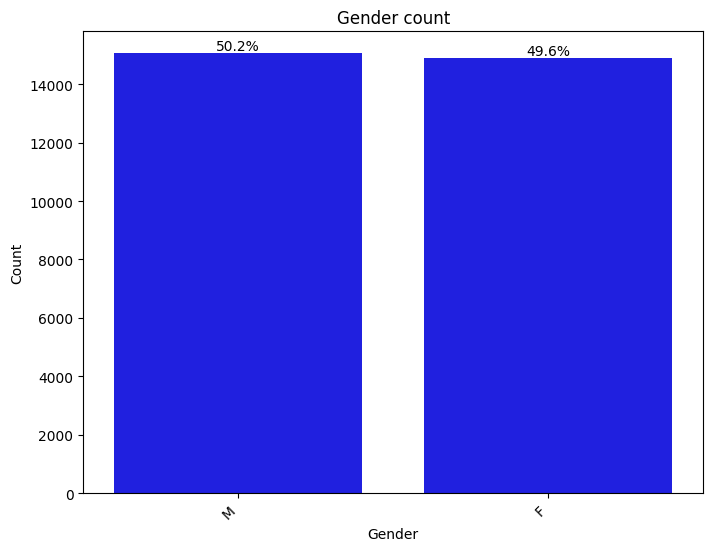

In [ ]:
create_bar_plot(cat_df, 'Gender')

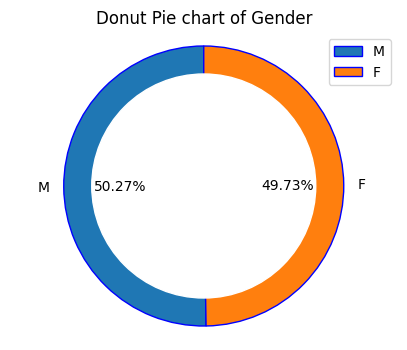

In [ ]:
create_donut_pie_chart(cat_df, 'Gender')

Interpretation:

We have almost the same number of Male and Female (50.27% vs 49.73%)

# **Income stability:**

In [ ]:
cat_df["Income Stability"].value_counts()

Low     25751
High     2566
Name: Income Stability, dtype: int64

In [ ]:
describe_feature(cat_df, "Income Stability")

Description:
count     28317
unique        2
top         Low
freq      25751
Name: Income Stability, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
      Count  Frequency (%)
Low   25751      90.938306
High   2566       9.061694


In [ ]:
missing_value_percentage(cat_df, "Income Stability")

'The percentage of missing rows is 5.61%'

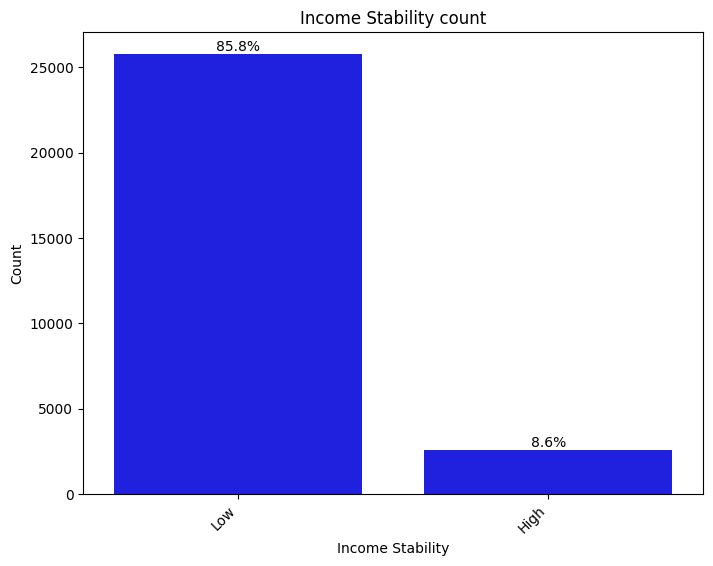

In [ ]:
create_bar_plot(cat_df, "Income Stability")

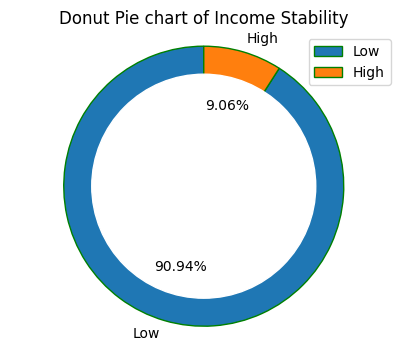

In [ ]:
create_donut_pie_chart(cat_df, "Income Stability")

# **Profession:**

In [ ]:
describe_feature(cat_df, "Profession")

Description:
count       30000
unique          8
top       Working
freq        16926
Name: Profession, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Working               16926      56.420000
Commercial associate   7962      26.540000
Pensioner              2740       9.133333
State servant          2366       7.886667
Unemployed                2       0.006667
Businessman               2       0.006667
Student                   1       0.003333
Maternity leave           1       0.003333


In [ ]:
missing_value_percentage(cat_df, "Profession")

'The percentage of missing rows is 0.00%'

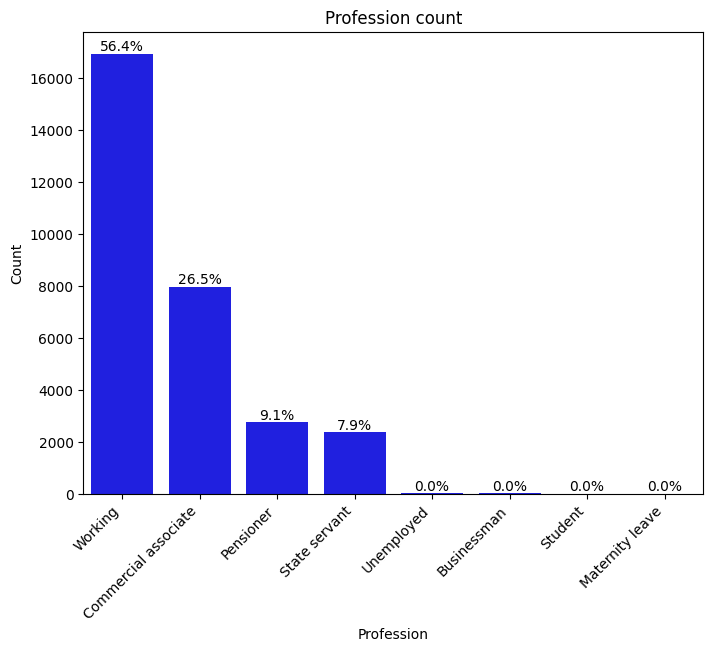

In [ ]:
create_bar_plot(cat_df,"Profession")

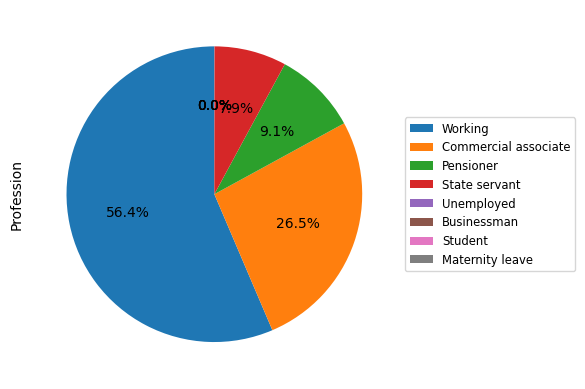

In [ ]:
# Plot a pie chart without labels
df['Profession'].value_counts().plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with labels
plt.legend(df['Profession'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# **Type of Employment:**

In [ ]:
describe_feature(cat_df, 'Type of Employment')

Description:
count        22730
unique          18
top       Laborers
freq          5578
Name: Type of Employment, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Laborers                5578      24.540255
Sales staff             3736      16.436428
Core staff              3230      14.210295
Managers                2495      10.976683
Drivers                 1606       7.065552
Accountants             1379       6.066872
High skill tech staff   1307       5.750110
Medicine staff           864       3.801144
Security staff           579       2.547294
Cooking staff            566       2.490101
Private service staff    342       1.504619
Cleaning staff           341       1.500220
Low-skill Laborers       162       0.712714
Secretaries              161       0.708315
Waiters/barmen staff     149       0.655521
Realty agents             86    

In [ ]:
missing_value_percentage(cat_df, 'Type of Employment')

'The percentage of missing rows is 24.23%'

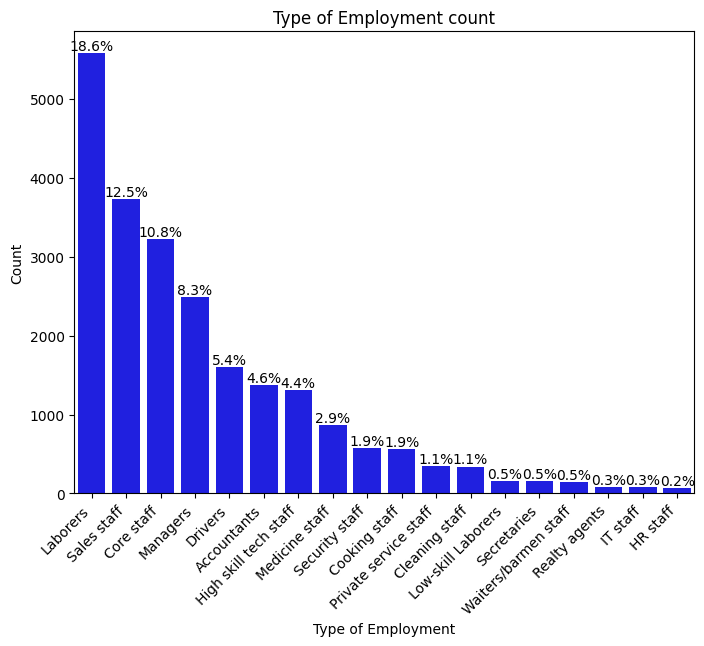

In [ ]:
create_bar_plot(cat_df, 'Type of Employment')

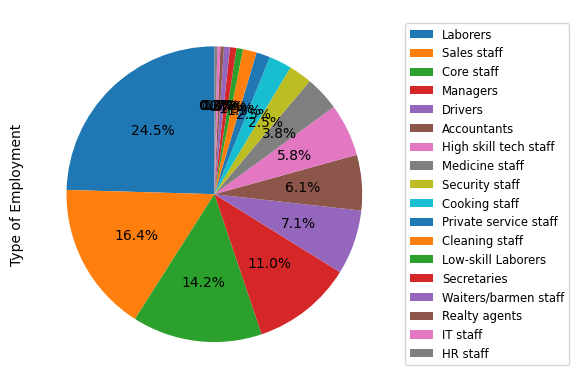

In [ ]:
# Plot a pie chart without labels
df['Type of Employment'].value_counts().plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with labels
plt.legend(df['Type of Employment'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

In [ ]:
describe_feature(cat_df, 'Location')

Description:
count          30000
unique             3
top       Semi-Urban
freq           21563
Name: Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  21563      71.876667
Rural        5338      17.793333
Urban        3099      10.330000


In [ ]:
missing_value_percentage(cat_df, 'Location')

'The percentage of missing rows is 0.00%'

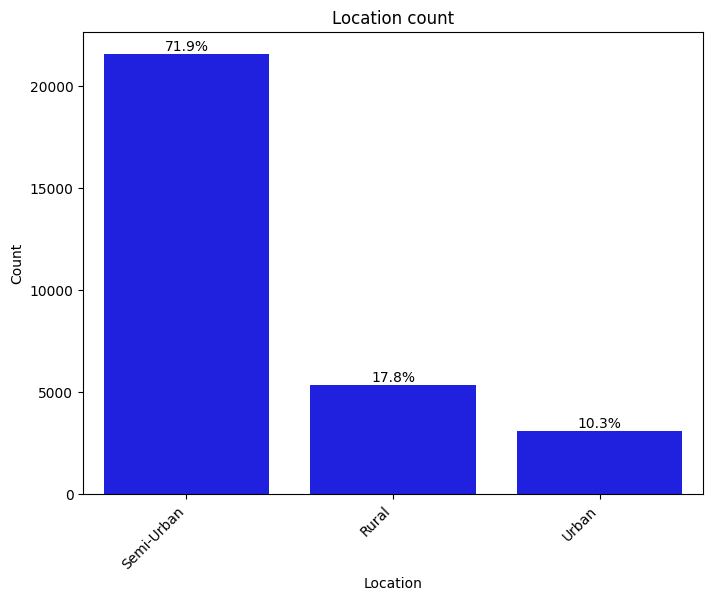

In [ ]:
create_bar_plot(cat_df, 'Location')

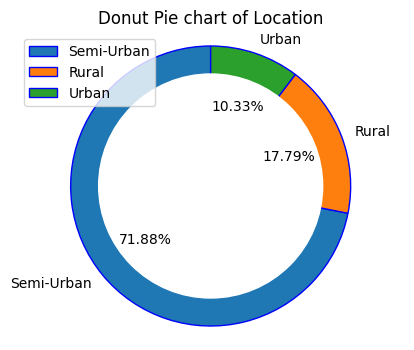

In [ ]:
create_donut_pie_chart(cat_df, 'Location')

# **Expense Type 1**

In [ ]:
describe_feature(cat_df, 'Expense Type 1')

Description:
count     30000
unique        2
top           N
freq      19214
Name: Expense Type 1, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
N  19214      64.046667
Y  10786      35.953333


In [ ]:
missing_value_percentage(cat_df, 'Expense Type 1')

'The percentage of missing rows is 0.00%'

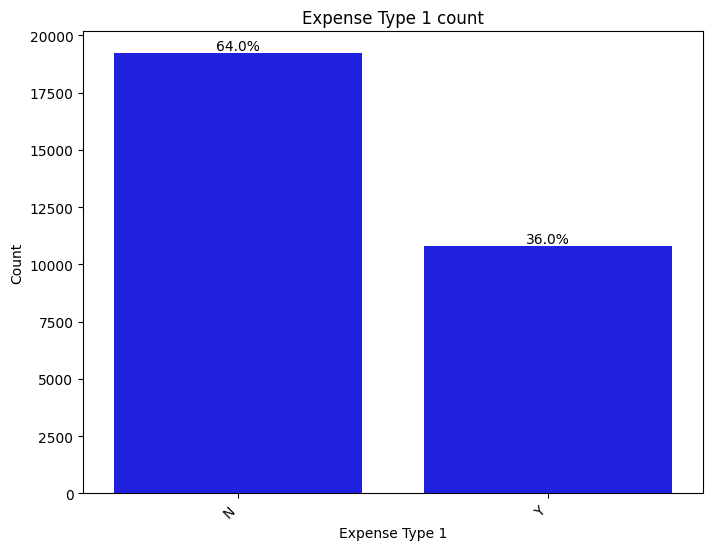

In [ ]:
create_bar_plot(cat_df, 'Expense Type 1')

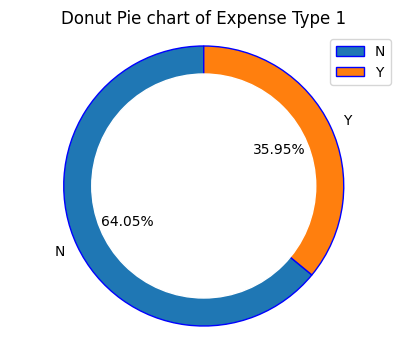

In [ ]:
create_donut_pie_chart(cat_df, 'Expense Type 1')

# **Expense Type 2:**

In [ ]:
describe_feature(cat_df, 'Expense Type 2')

Description:
count     30000
unique        2
top           Y
freq      20180
Name: Expense Type 2, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
Y  20180      67.266667
N   9820      32.733333


In [ ]:
missing_value_percentage(cat_df, 'Expense Type 2')

'The percentage of missing rows is 0.00%'

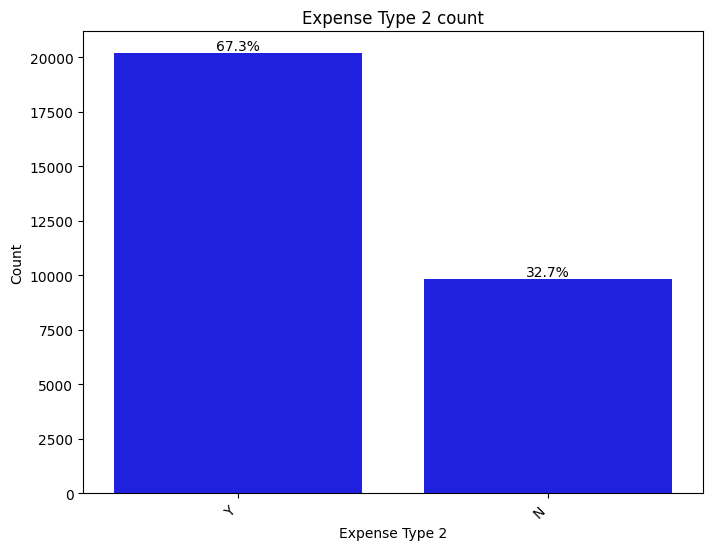

In [ ]:
create_bar_plot(cat_df, 'Expense Type 2')

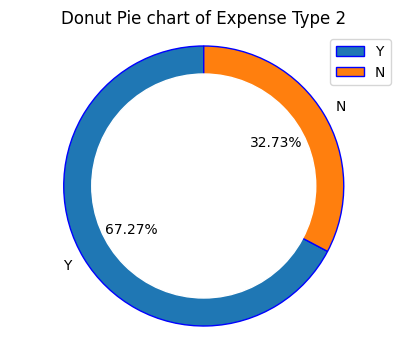

In [ ]:
create_donut_pie_chart(cat_df, 'Expense Type 2')

# **Has Active Credit Card:**

In [ ]:
describe_feature(cat_df, 'Has Active Credit Card')

Description:
count      28434
unique         3
top       Active
freq        9771
Name: Has Active Credit Card, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
             Count  Frequency (%)
Active        9771       34.36379
Inactive      9466       33.29113
Unpossessed   9197       32.34508


In [ ]:
missing_value_percentage(cat_df, 'Has Active Credit Card')

'The percentage of missing rows is 5.22%'

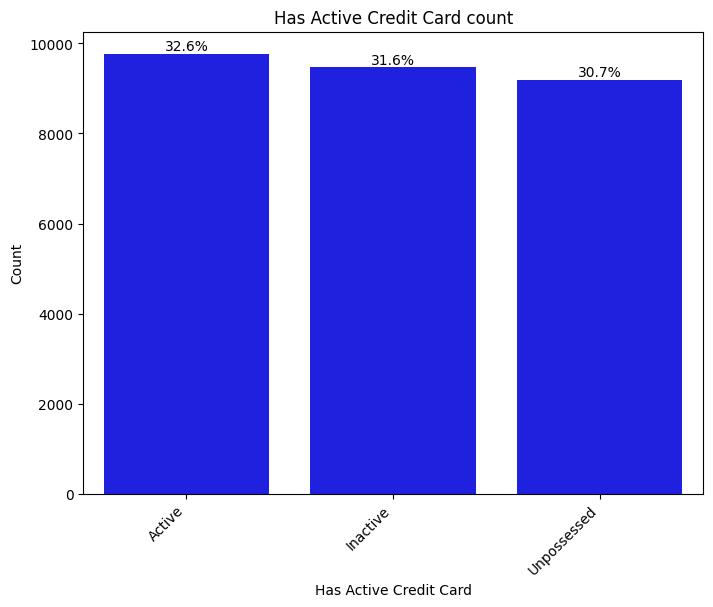

In [ ]:
create_bar_plot(cat_df, 'Has Active Credit Card')

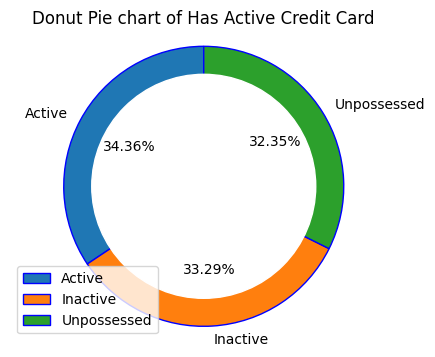

In [ ]:
create_donut_pie_chart(cat_df, 'Has Active Credit Card')

# **Property Location**

In [ ]:
describe_feature(cat_df, 'Property Location')

Description:
count          29644
unique             3
top       Semi-Urban
freq           10387
Name: Property Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  10387      35.039131
Rural       10041      33.871947
Urban        9216      31.088922


In [ ]:
missing_value_percentage(cat_df, 'Property Location')

'The percentage of missing rows is 1.19%'

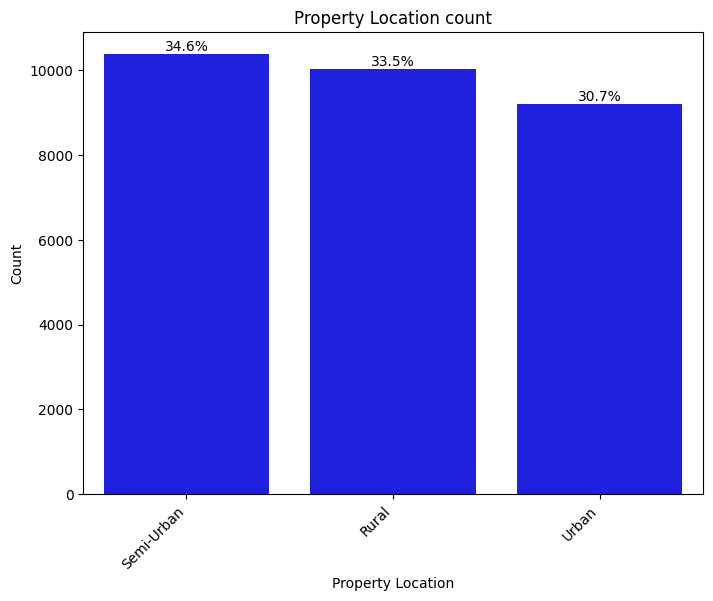

In [ ]:
create_bar_plot(cat_df, 'Property Location')

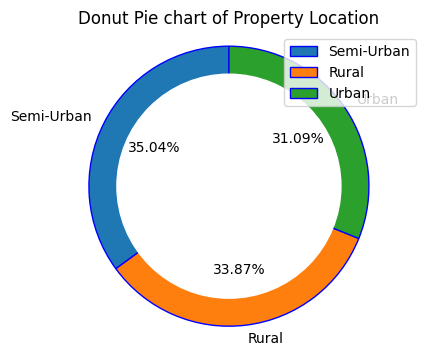

In [ ]:
create_donut_pie_chart(cat_df, 'Property Location')

# **Univariate Analysis on Numeric Columns:**

In [ ]:
num_df = df.select_dtypes(exclude = "object")
num_df.head(2)

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.05,72809.58,241.08,3.0,809.44,0,746,1933.05,4,1,119933.46,54607.18
1,32,4952.91,46837.47,495.81,1.0,780.40,0,608,4952.91,2,1,54791.00,37469.98


In [ ]:
num_df.columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
       'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

# **Age**

In [ ]:
describe_feature(num_df, 'Age')

Description:
count    30000.000000
mean        40.092300
std         16.045129
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.046093801598670575


In [ ]:
missing_value_percentage(num_df, 'Age')

'The percentage of missing rows is 0.00%'

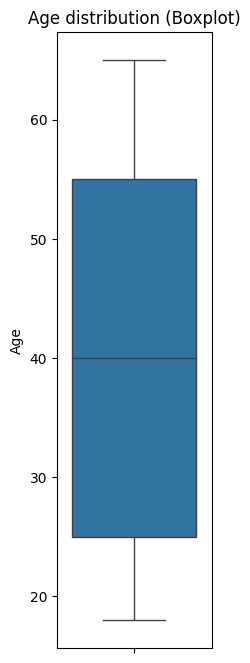

In [ ]:
create_box_plot(num_df, 'Age')

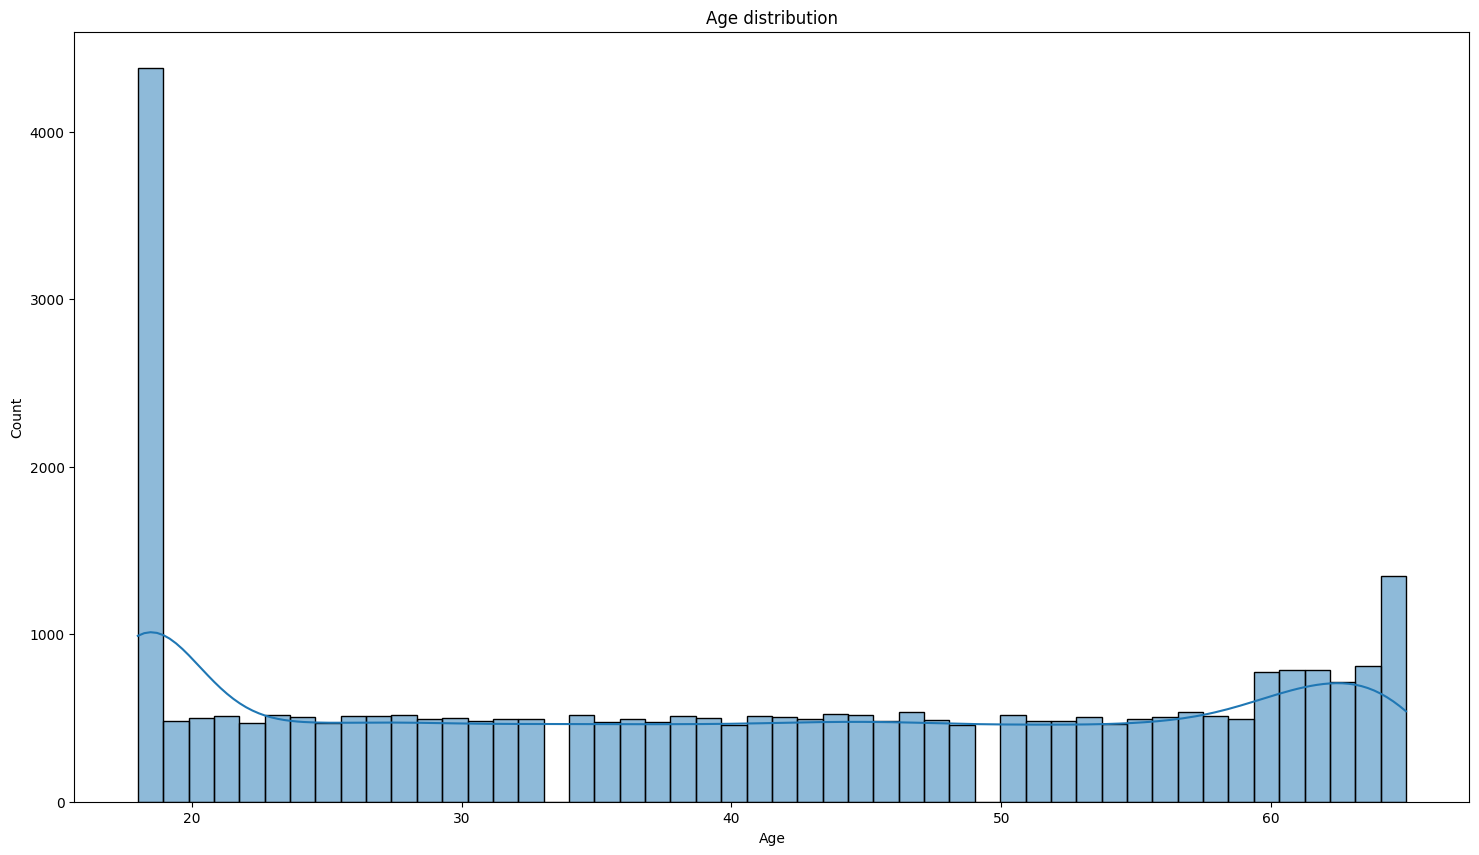

In [ ]:
create_hist_plot(num_df, 'Age', the_bins=50)

In [ ]:
missing_value_percentage(num_df, 'Age')

'The percentage of missing rows is 0.00%'

Interpretation:

Age is not normally distributed.

We have a large number of applicants who are 18 and 65 years old.

Mean and median of age is 40 years old.

# **Income (USD)**

In [ ]:
describe_feature(num_df, 'Income (USD)')

Description:
count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
154.0017199982858


In [ ]:
missing_value_percentage(num_df, 'Income (USD)')

'The percentage of missing rows is 15.25%'

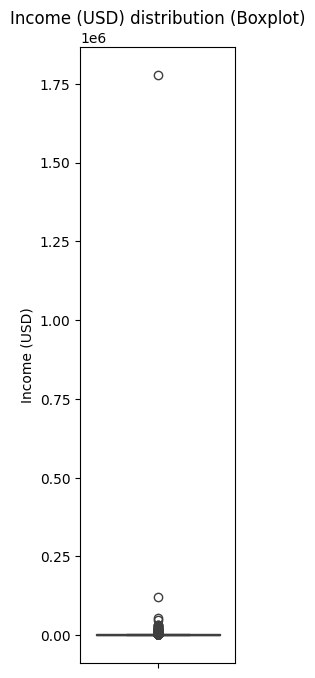

In [ ]:
create_box_plot(num_df, 'Income (USD)')

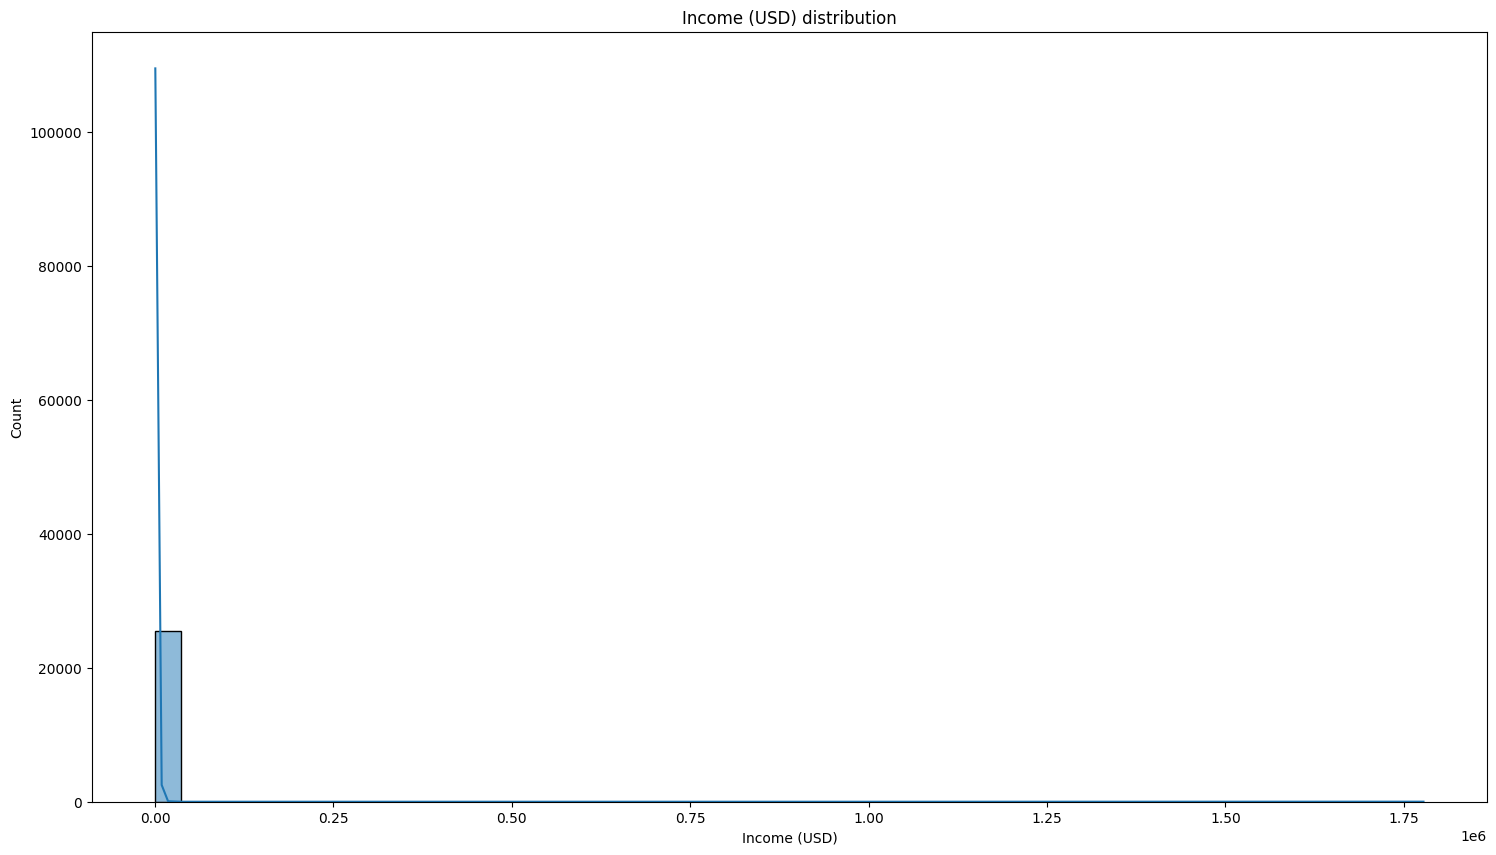

In [ ]:
create_hist_plot(num_df, 'Income (USD)', the_bins=50)

Interpretation:

The Income feature has 15% of its data missing.

The Income is positively skewed.

The Income has a lot of outliers.

The median income is $2229.

# **Loan Amount Request (USD)**

In [ ]:
describe_feature(num_df, 'Loan Amount Request (USD)')

Description:
count     30000.000000
mean      88826.333855
std       59536.949605
min        6048.240000
25%       41177.755000
50%       75128.075000
75%      119964.605000
max      621497.820000
Name: Loan Amount Request (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2603921833589773


In [ ]:
missing_value_percentage(num_df, 'Loan Amount Request (USD)')

'The percentage of missing rows is 0.00%'

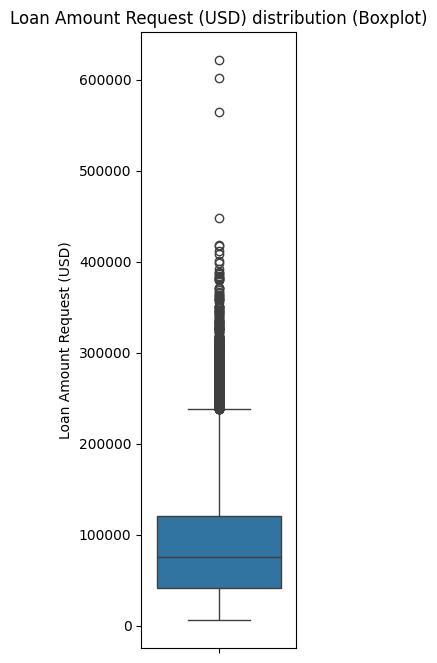

In [ ]:
create_box_plot(num_df, 'Loan Amount Request (USD)')

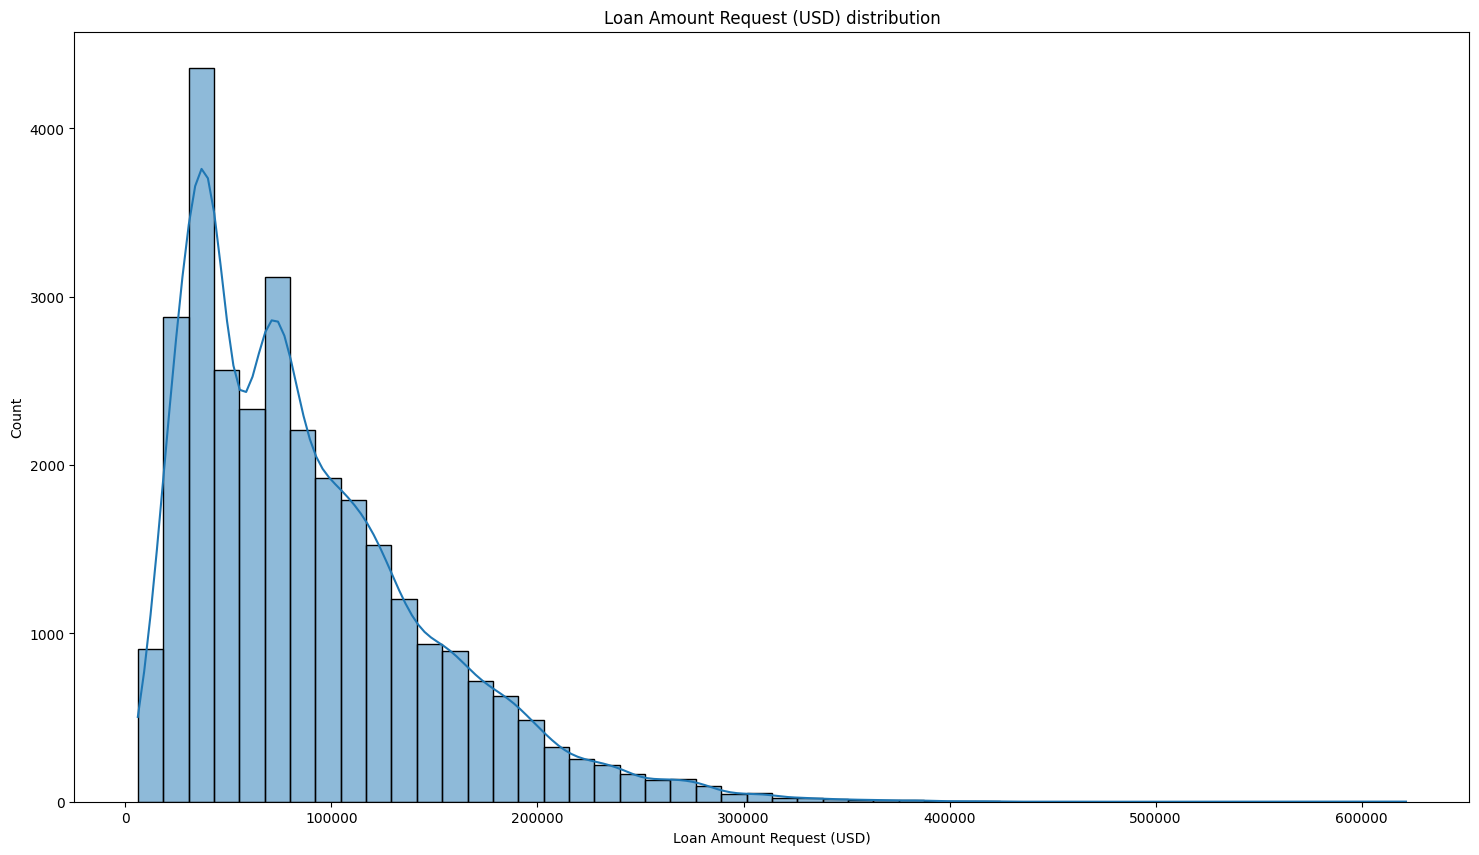

In [ ]:
create_hist_plot(num_df, 'Loan Amount Request (USD)', the_bins=50)

Interpretation:

The median of the loan amount request is $75326.655000.

We have quite a number of outliers in the loan amount request.

The loan amount request distribution is positively skewed.

# **Current Loan Expenses (USD)**

In [ ]:
describe_feature(num_df, 'Current Loan Expenses (USD)')

Description:
count    29828.000000
mean       400.936876
std        242.545375
min       -999.000000
25%        247.667500
50%        375.205000
75%        521.292500
max       3840.880000
Name: Current Loan Expenses (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
0.04432815526113482


In [ ]:
missing_value_percentage(num_df, 'Current Loan Expenses (USD)')

'The percentage of missing rows is 0.57%'

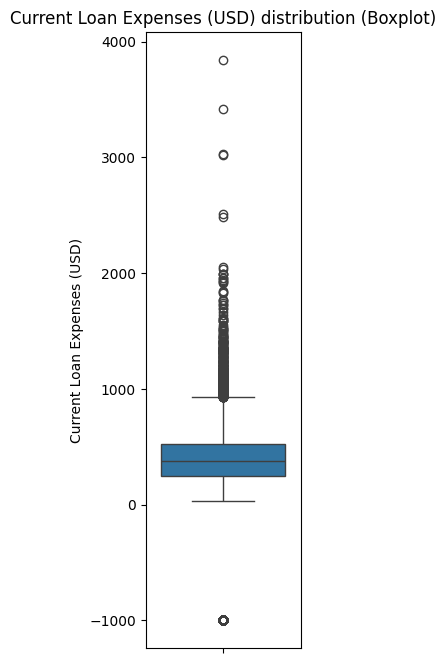

In [ ]:
create_box_plot(num_df, 'Current Loan Expenses (USD)')

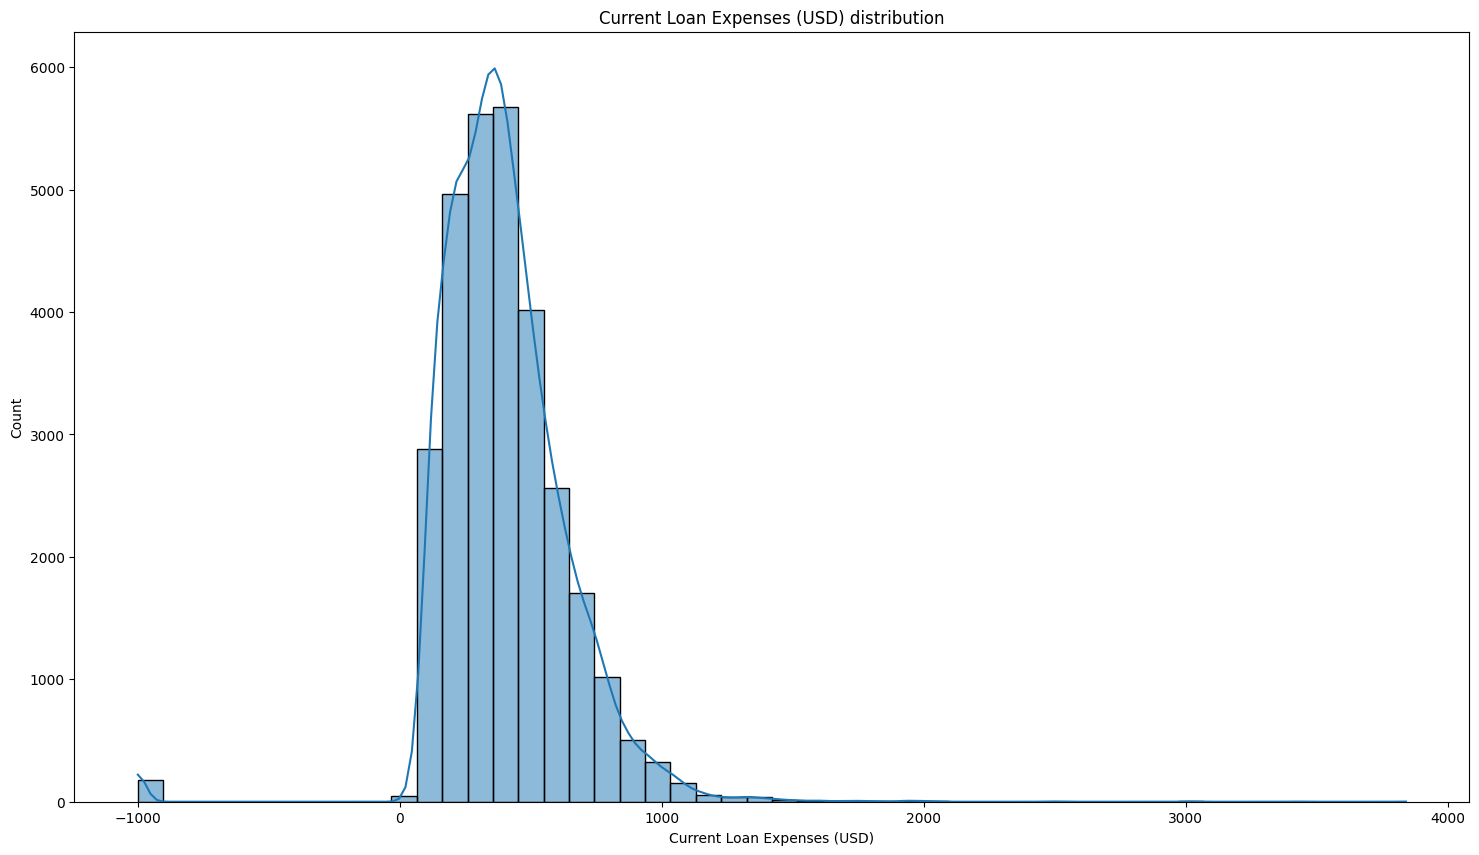

In [ ]:
create_hist_plot(num_df, 'Current Loan Expenses (USD)', the_bins=50)

Interpretation:

The mean current loan expenses is $375.275.

We have also some outliers.

The current loan expenses is positively skewed

# **Dependents**

In [ ]:
describe_feature(num_df, 'Dependents')

Description:
count    27507.000000
mean         2.253027
std          0.951162
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: Dependents, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
2.0   13108      47.653325
3.0    5719      20.791071
1.0    5544      20.154870
4.0    2704       9.830225
5.0     372       1.352383
6.0      50       0.181772
7.0       7       0.025448
8.0       1       0.003635
10.0      1       0.003635
14.0      1       0.003635


In [ ]:
missing_value_percentage(num_df, 'Dependents')

'The percentage of missing rows is 8.31%'

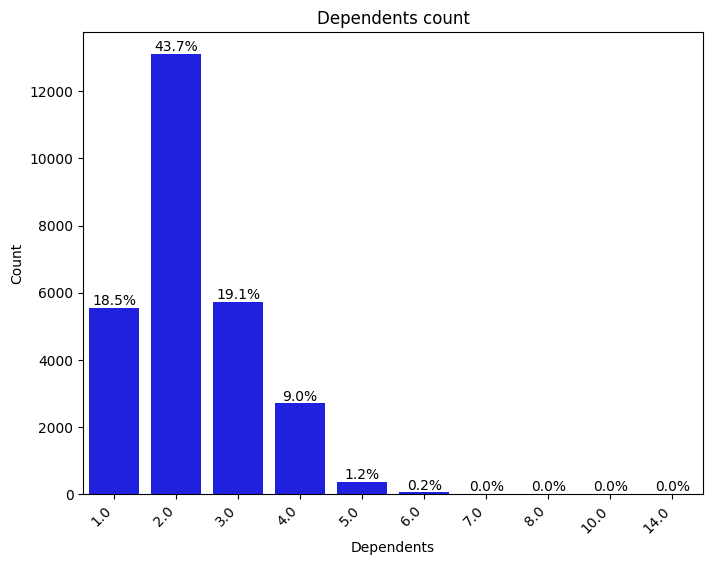

In [ ]:
create_bar_plot(num_df, 'Dependents')

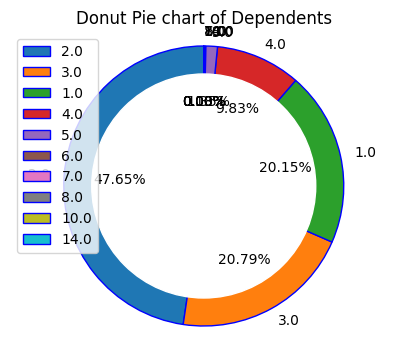

In [ ]:
create_donut_pie_chart(num_df, 'Dependents')

Interpretation:

Most applicants have 2 dependents.

Then 1 and 3 dependents are the second most common.

Then 4 and 5 and so on.

# **Credit Score:**

In [ ]:
describe_feature(num_df, 'Credit Score')

Description:
count    28297.000000
mean       739.885381
std         72.163846
min        580.000000
25%        681.880000
50%        739.820000
75%        799.120000
max        896.260000
Name: Credit Score, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.020255169213215216


In [ ]:
missing_value_percentage(num_df, 'Credit Score')

'The percentage of missing rows is 5.68%'

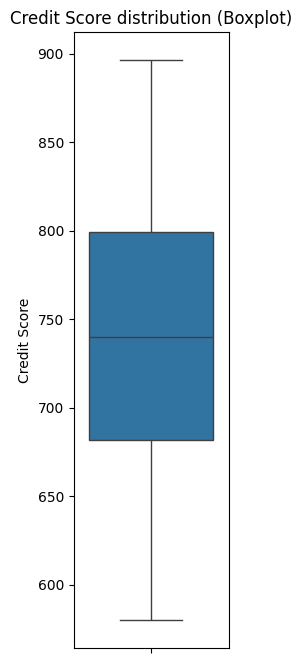

In [ ]:
create_box_plot(num_df, 'Credit Score')

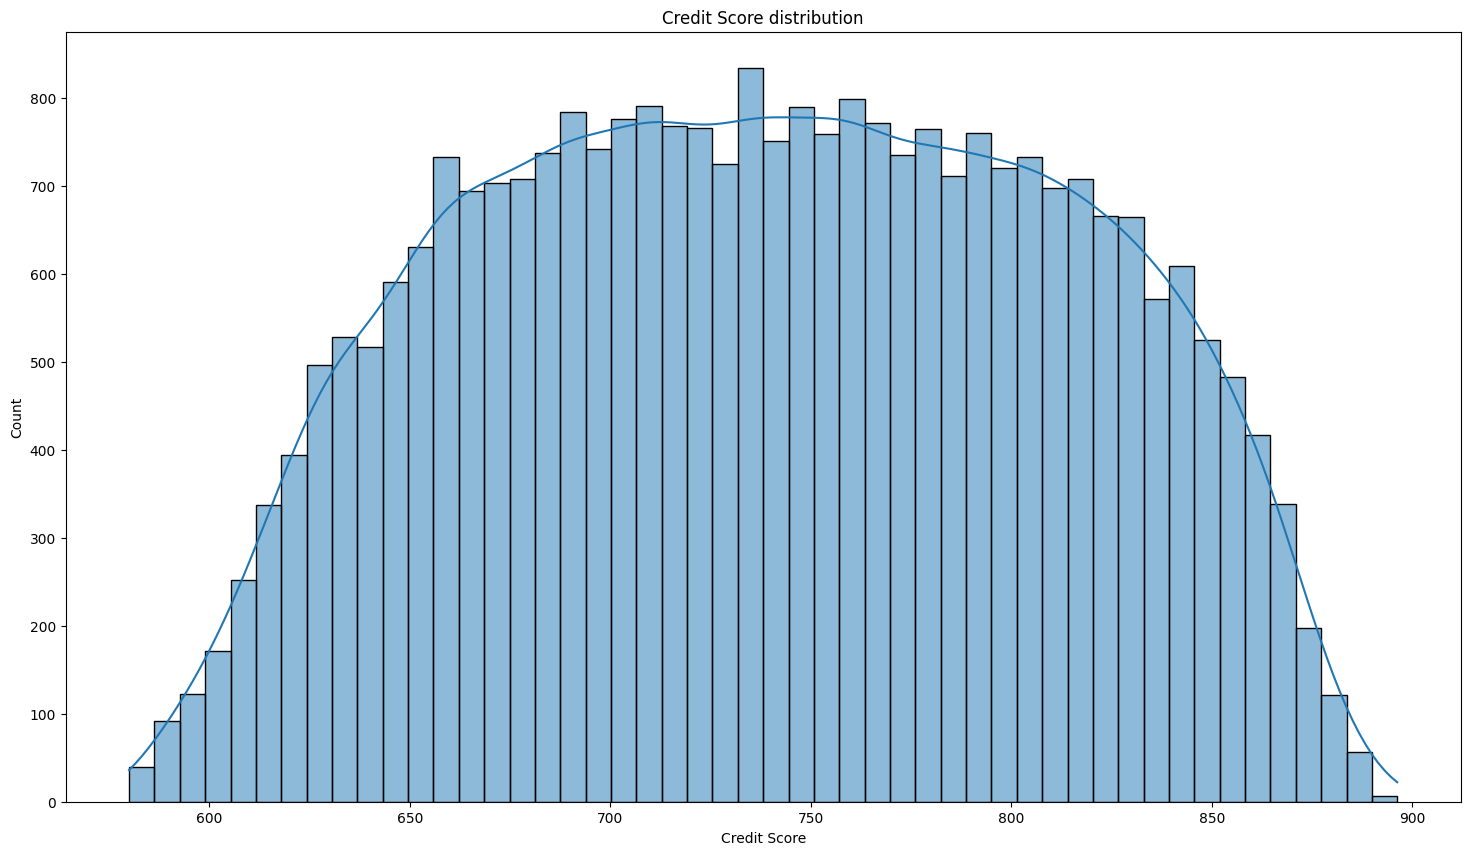

In [ ]:
create_hist_plot(num_df, 'Credit Score', the_bins=50)

Interpretation:

The mean and median of applicants's credit score is 739.

The credit score does not seems to be skewed but it is not normally distributed.

# **No. of Defaults**

In [ ]:
describe_feature(num_df, 'No. of Defaults')

Description:
count    30000.000000
mean         0.193933
std          0.395384
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No. of Defaults, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0  24182      80.606667
1   5818      19.393333


In [ ]:
missing_value_percentage(num_df, 'No. of Defaults')

'The percentage of missing rows is 0.00%'

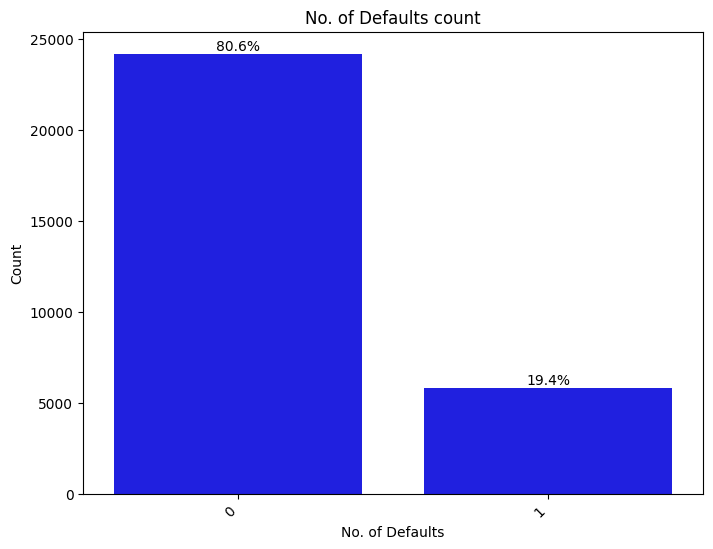

In [ ]:
create_bar_plot(num_df, 'No. of Defaults')

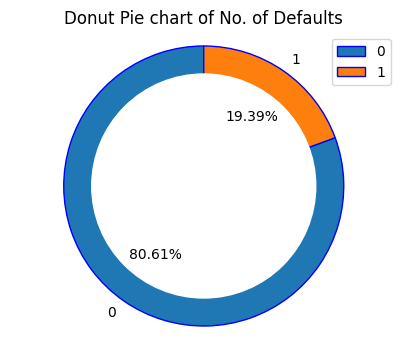

In [ ]:
create_donut_pie_chart(num_df, 'No. of Defaults')

nterpretation:

8 of 10 people don't have a any loan defaulted

# **Property Age**

In [ ]:
describe_feature(num_df, 'Property Age')

Description:
count      68.856947
mean        7.203612
std        30.999800
min         1.034086
25%         4.518686
50%         6.086927
75%         8.463812
max      4866.420835
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
153.2196101099395


In [ ]:
missing_value_percentage(num_df, 'Property Age')

'The percentage of missing rows is 16.17%'

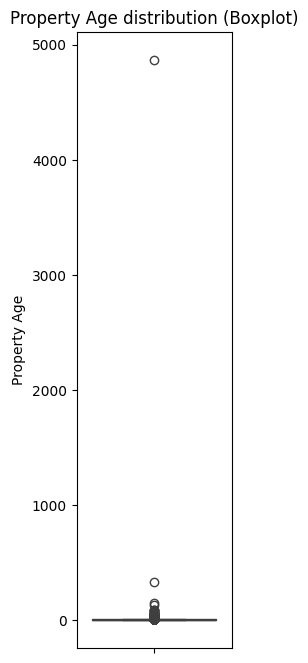

In [ ]:
create_box_plot(num_df, 'Property Age')

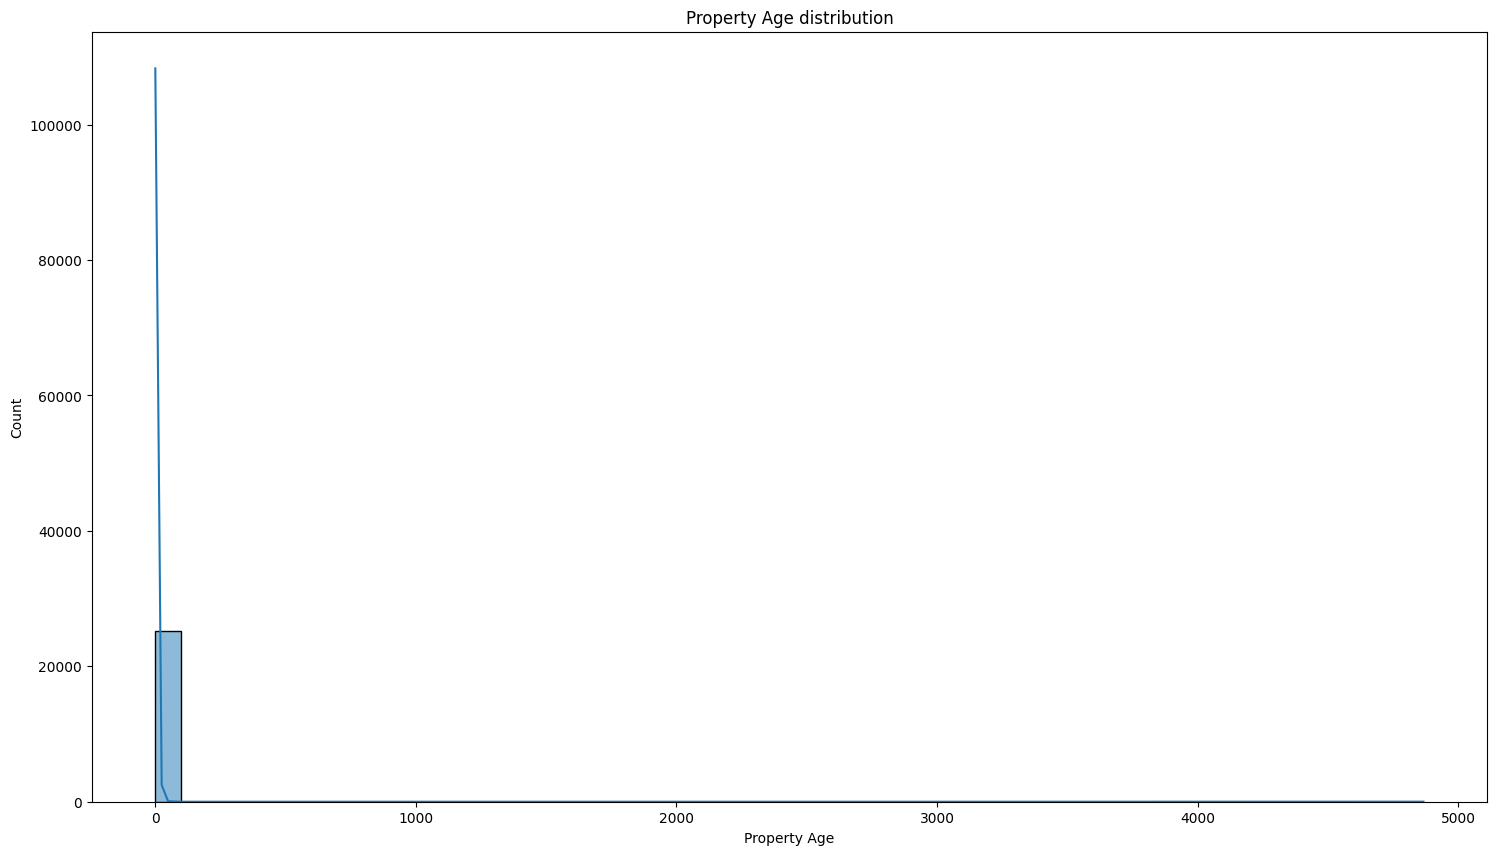

In [ ]:
create_hist_plot(num_df, 'Property Age')

Interpretation:

Assuming that the property age is expressed in days, most of properties have a median age of 2231 days(6.1 years).

 The property age distribution is positively skewed.

# **Property Type**

In [ ]:
describe_feature(num_df, 'Property Type')

Description:
count    30000.000000
mean         2.460067
std          1.118562
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Property Type, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
1   7863      26.210000
2   7650      25.500000
3   7309      24.363333
4   7178      23.926667


In [ ]:
missing_value_percentage(num_df, 'Property Type')

'The percentage of missing rows is 0.00%'

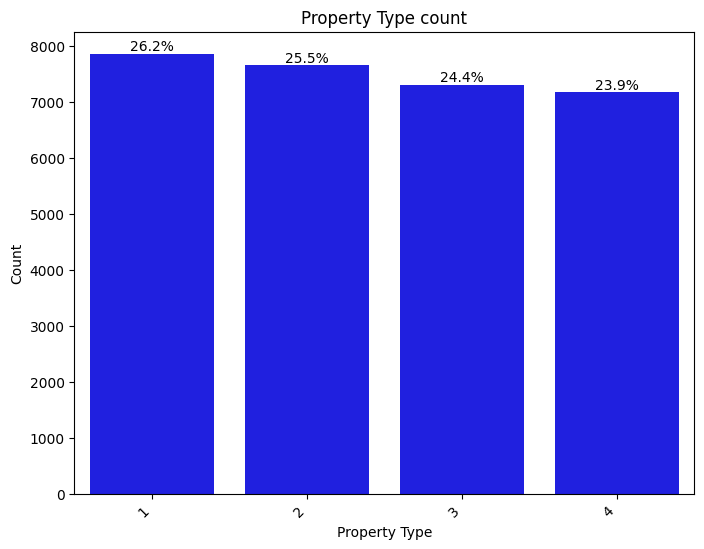

In [ ]:
create_bar_plot(num_df, 'Property Type')

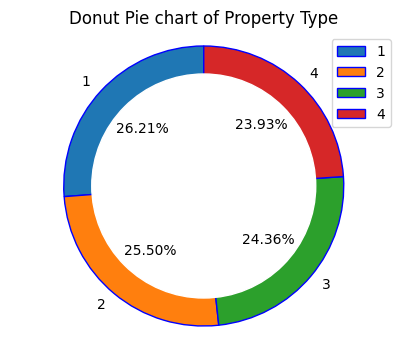

In [ ]:
create_donut_pie_chart(num_df, 'Property Type')

Interpretation:

We have almost an equal amount of property types, each with 25%.


# **Co-Applicant**

In [ ]:
describe_feature(num_df, 'Co-Applicant')

Description:
count    30000.000000
mean        -4.743867
std         74.614593
min       -999.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Co-Applicant, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
      Count  Frequency (%)
 1    25516      85.053333
 0     4316      14.386667
-999    168       0.560000


In [ ]:
missing_value_percentage(num_df, 'Co-Applicant')

'The percentage of missing rows is 0.00%'

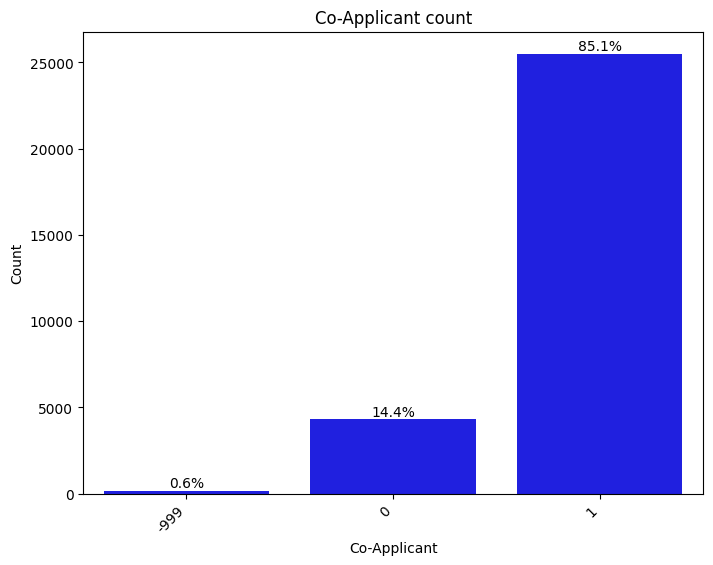

In [ ]:
create_bar_plot(num_df, 'Co-Applicant')

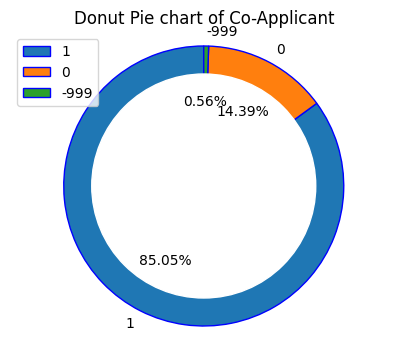

In [ ]:
create_donut_pie_chart(num_df, 'Co-Applicant')

Interpretation:

Most of applicants have a co-applicants (~85%).

14% of applicants don't have a co-applicant.

The rest are unknown (~0.5%).


# **Property Price**

In [ ]:
describe_feature(num_df, 'Property Price')

Description:
count    3.000000e+04
mean     1.317597e+05
std      9.354955e+04
min     -9.990000e+02
25%      6.057216e+04
50%      1.099936e+05
75%      1.788807e+05
max      1.077967e+06
Name: Property Price, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.4169646295074756


In [ ]:
missing_value_percentage(num_df, 'Property Price')

'The percentage of missing rows is 0.00%'

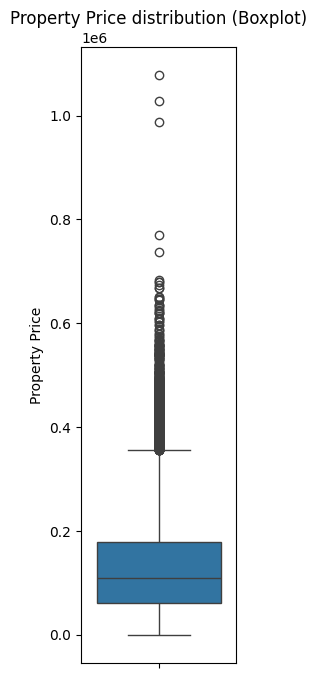

In [ ]:
create_box_plot(num_df, 'Property Price')

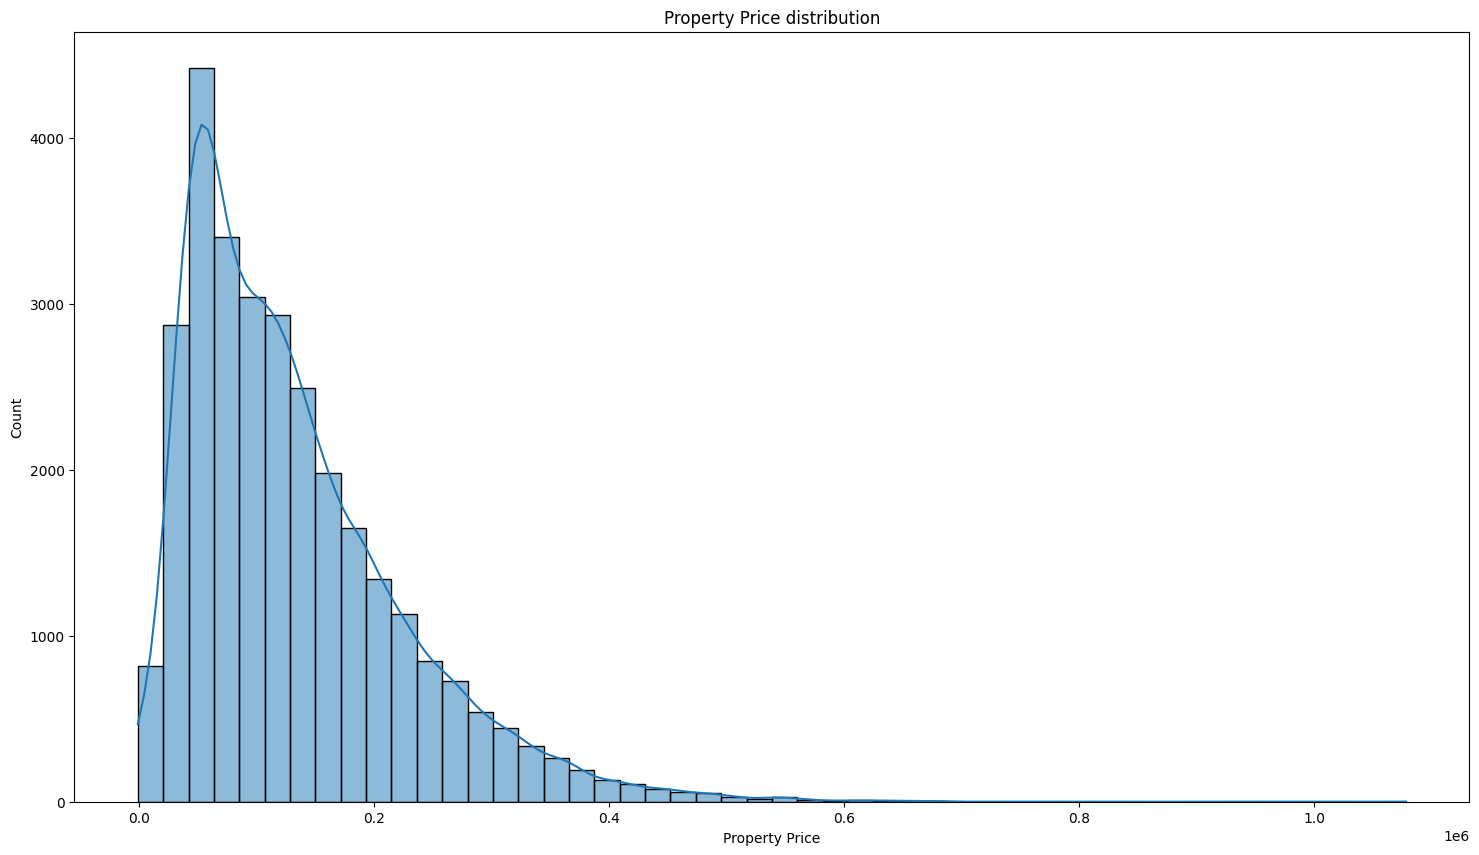

In [ ]:
create_hist_plot(num_df, 'Property Price', the_bins=50)

Interpretation:

The median property price is $110168.710. We have quite a number of outliers.

The distribution of the property price is skewed to the right.

# **Loan Sanction Amount (USD)**

In [ ]:
describe_feature(num_df, 'Loan Sanction Amount (USD)')

Description:
count     29660.000000
mean      47649.342208
std       48221.146686
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan Sanction Amount (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2299390309619023


In [ ]:
missing_value_percentage(num_df, 'Loan Sanction Amount (USD)')

'The percentage of missing rows is 1.13%'

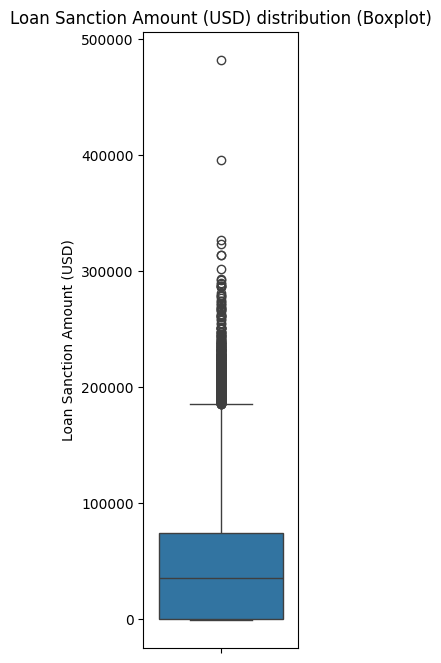

In [ ]:
create_box_plot(num_df, 'Loan Sanction Amount (USD)')

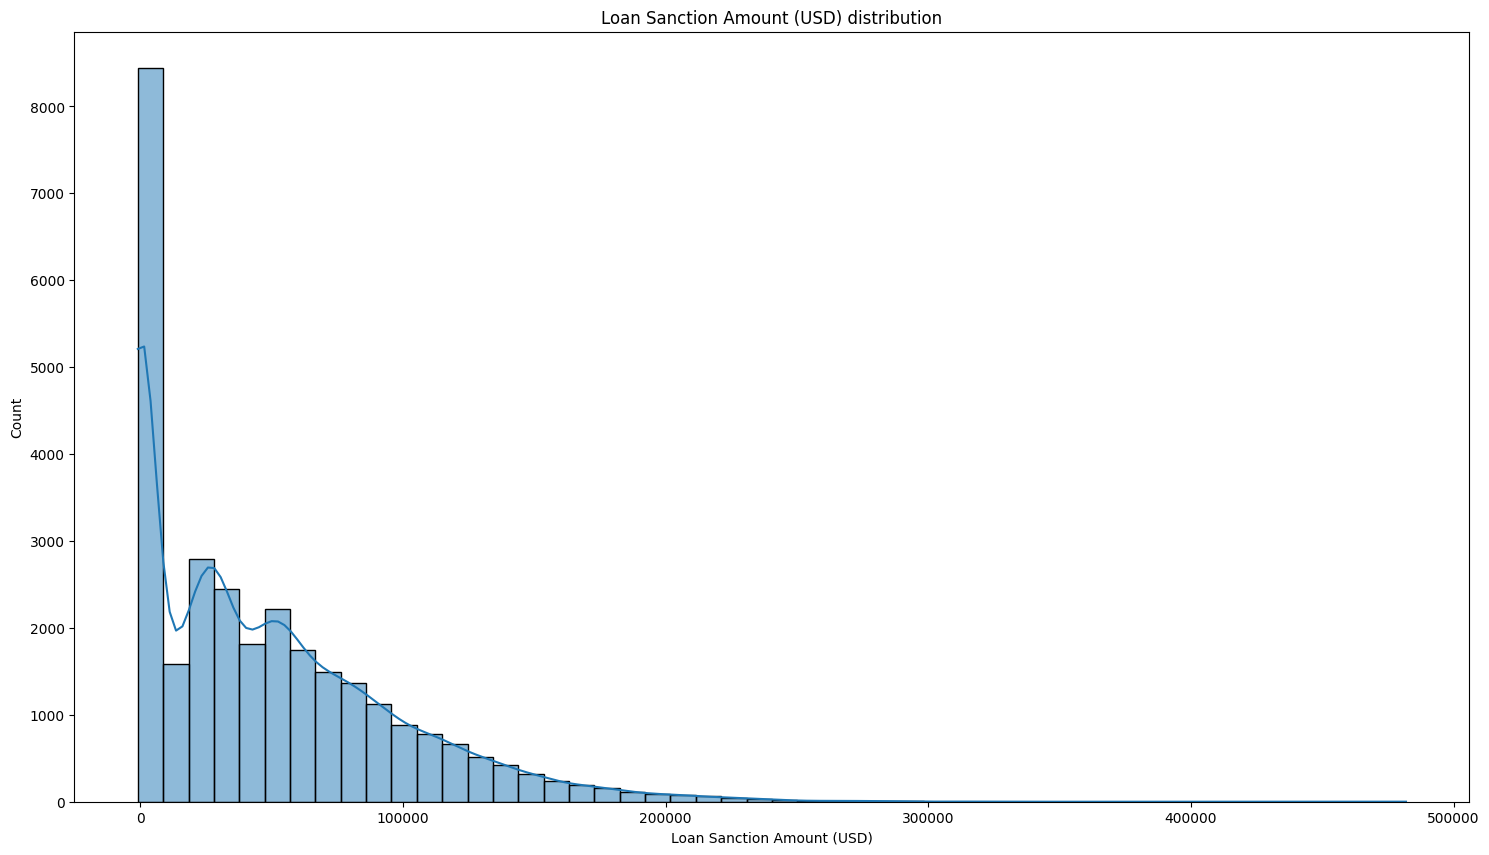

In [ ]:
create_hist_plot(num_df, 'Loan Sanction Amount (USD)', the_bins=50)

Interpretation:

The median loan sanction amount is $35273.020

We have quite a number of outliers.

The distribution of the loan sanction amount is skewed to the right.

# **Bivariate Analysis:**